## EDA

In [196]:
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

### Read Project Data

In [198]:
url = "https://raw.githubusercontent.com/MIDS-at-Duke/unifying-data-science-2023-project-team3/EDA/20_intermediate_files/project_data.csv?token=GHSAT0AAAAAACAZ7EJZNJCFO4JPHXMO5IPOZCB43AQ"
data = pd.read_csv(url)
data.head()


,Unnamed: 0,CoC Number,Coc,Year,permanent_housing,homeless,poverty,unemployment_rate,Population,Male,...,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Two or More Races,Non Hispanic,Hispanic,Drug Deaths,Suicide Deaths
0,0,AZ-502,"Phoenix,Mesa/Maricopa",2007,2014.0,8448,3832171.0,3.2,60969,31121,...,49894,3613,2261,1937,166,3098,33167,27802,575.0,568.0
1,1,AZ-502,"Phoenix,Mesa/Maricopa",2008,2523.0,7189,3903475.0,5.1,59600,30420,...,48065,3766,2332,1985,146,3306,32312,27288,526.0,540.0
2,2,AZ-502,"Phoenix,Mesa/Maricopa",2009,2529.0,7889,3972331.0,8.9,52910,26919,...,42087,3550,1949,1909,148,3267,28793,24117,566.0,524.0
3,3,AZ-502,"Phoenix,Mesa/Maricopa",2010,3013.0,6999,3772257.0,9.5,54424,27741,...,43435,3559,2005,1982,149,3294,29386,25038,609.0,564.0
4,4,AZ-502,"Phoenix,Mesa/Maricopa",2011,3214.0,5831,3824961.0,8.5,3875371,1915659,...,3303462,212348,101821,149099,10314,98327,2724688,1150683,627.0,621.0


In [199]:
data.columns

Index(['Unnamed: 0', 'CoC Number', 'Coc', 'Year', 'permanent_housing',
       'homeless', 'poverty', 'unemployment_rate', 'Population', 'Male',
       'Female', 'White', 'Black or African American',
       'American Indian and Alaska Native', 'Asian',
       'Native Hawaiian and Other Pacific Islander', 'Two or More Races',
       'Non Hispanic', 'Hispanic', 'Drug Deaths', 'Suicide Deaths'],
      dtype='object')

In [ ]:
# Homeless rate per 10000 > (homeless / population) * 10000 > confirm metrics

data["homeless_rate"] = (data["homeless"] / data["Population"]) * 100_000
data["poverty_rate"] = (data["poverty"] / data["Population"]) * 100_000
data["suicide_rate"] = (data["Suicide Deaths"] / data["Population"]) * 100_000
data["drug_rate"] = (data["Drug Deaths"] / data["Population"]) * 100_000


### Question 1

### What were the cities/counties with the largest amount of homeless people when the Housing First approach was implemented?

In [ ]:
Cocs = data["CoC Number"].unique().tolist()
homeless_07 = []
homeless_21 = []

for i in Cocs:
    tmp_07 = data[(data["CoC Number"] == i) & (data["Year"] == 2007)][
        "homeless"
    ].to_list()
    tmp_21 = data[(data["CoC Number"] == i) & (data["Year"] == 2021)][
        "homeless"
    ].to_list()
    homeless_07.append(tmp_07[0])
    homeless_21.append(tmp_21[0])


In [ ]:
# make a dict
homeless_07_21 = {}

for i in range(len(Cocs)):
    tmp_pair = [homeless_07[i], homeless_21[i]]
    homeless_07_21[Cocs[i]] = tmp_pair
# sort the data
sorted_07_21 = sorted(homeless_07_21.items(), key=lambda x: x[1][0], reverse=True)
Cocs_numbers, homeless_data = zip(*sorted_07_21)


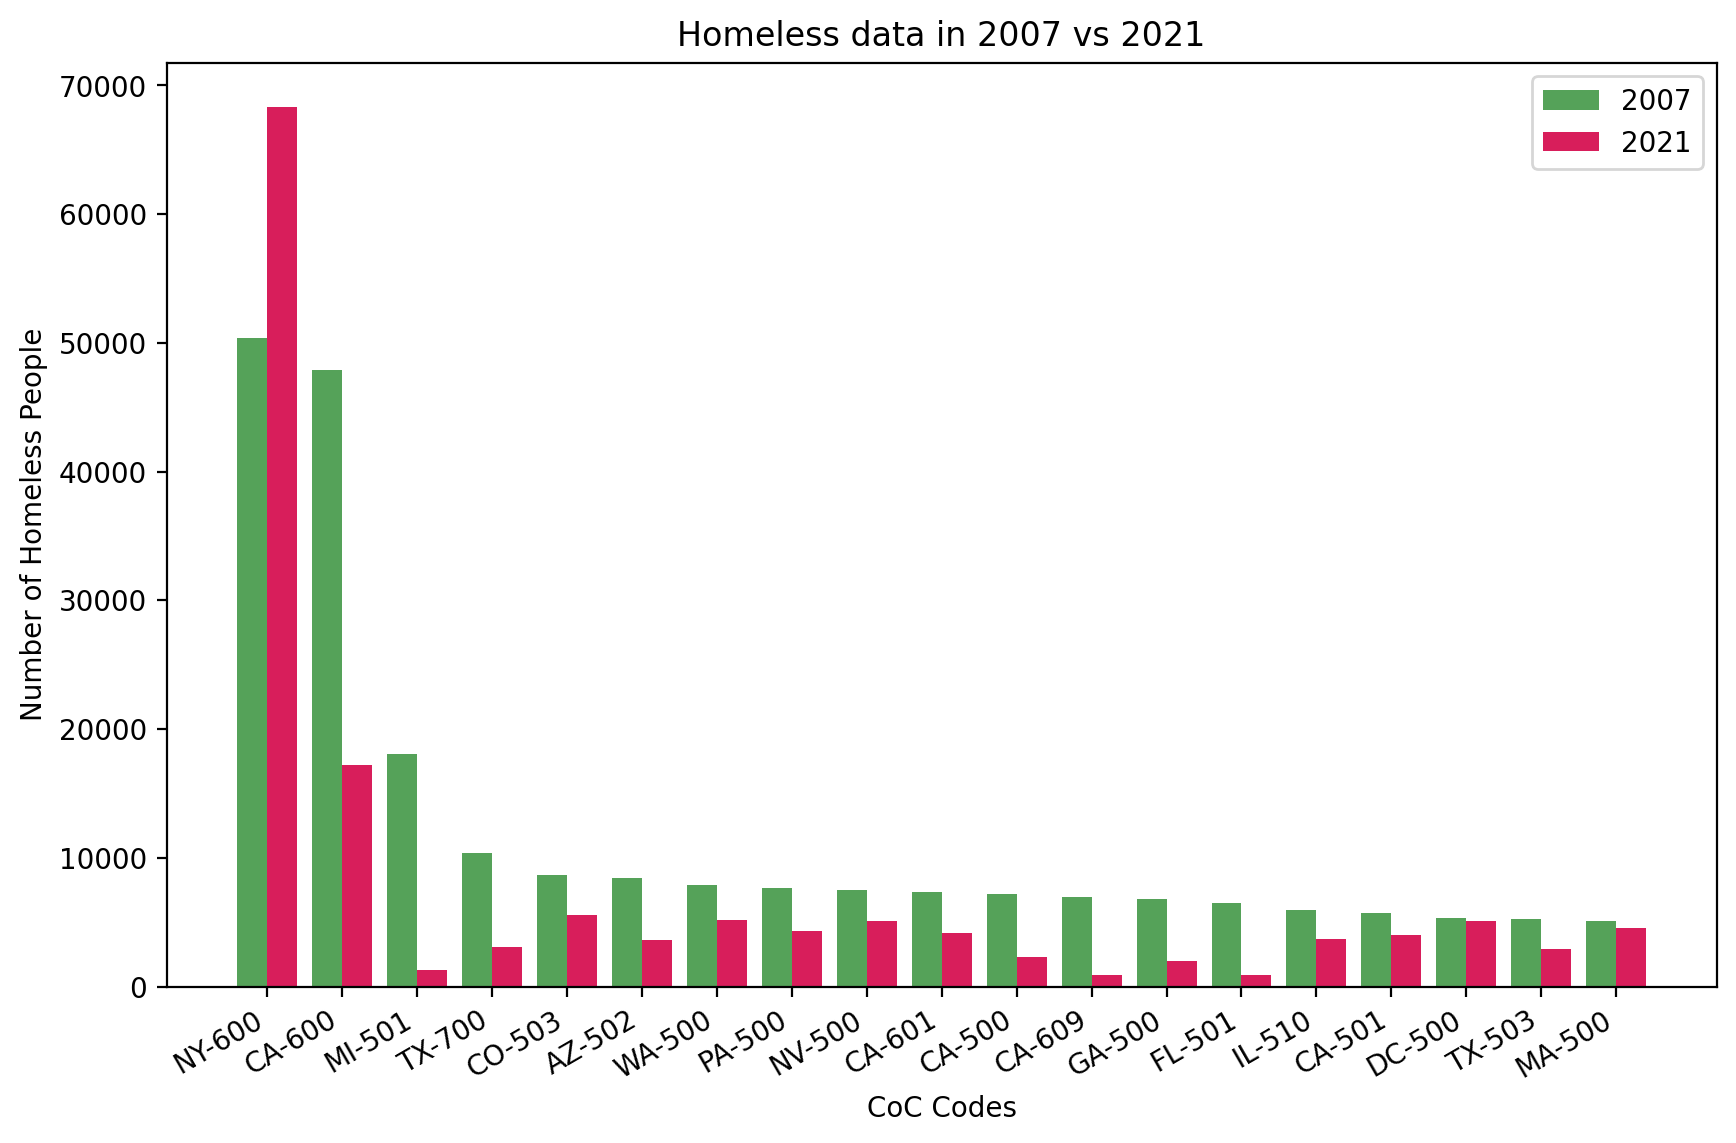

In [ ]:
# plot the bars for 2007 and 2021
fig, ax = plt.subplots(figsize=(10, 6))
ind = range(len(Cocs_numbers))
width = 0.4
ax.bar(ind, [v[0] for v in homeless_data], width, label="2007", color="#55A259")
ax.bar(
    [i + width for i in ind],
    [v[1] for v in homeless_data],
    width,
    label="2021",
    color="#D81E5B",
)
ax.set_xticks([i + width / 2 for i in ind])
ax.set_xticklabels(Cocs_numbers)
ax.set_xlabel("CoC Codes")
ax.set_ylabel("Number of Homeless People")
ax.set_title("Homeless data in 2007 vs 2021")
ax.legend()

plt.xticks(rotation=30, ha="right")
plt.show()


### Q2

### What are the factors that are expected to cause homelessness?

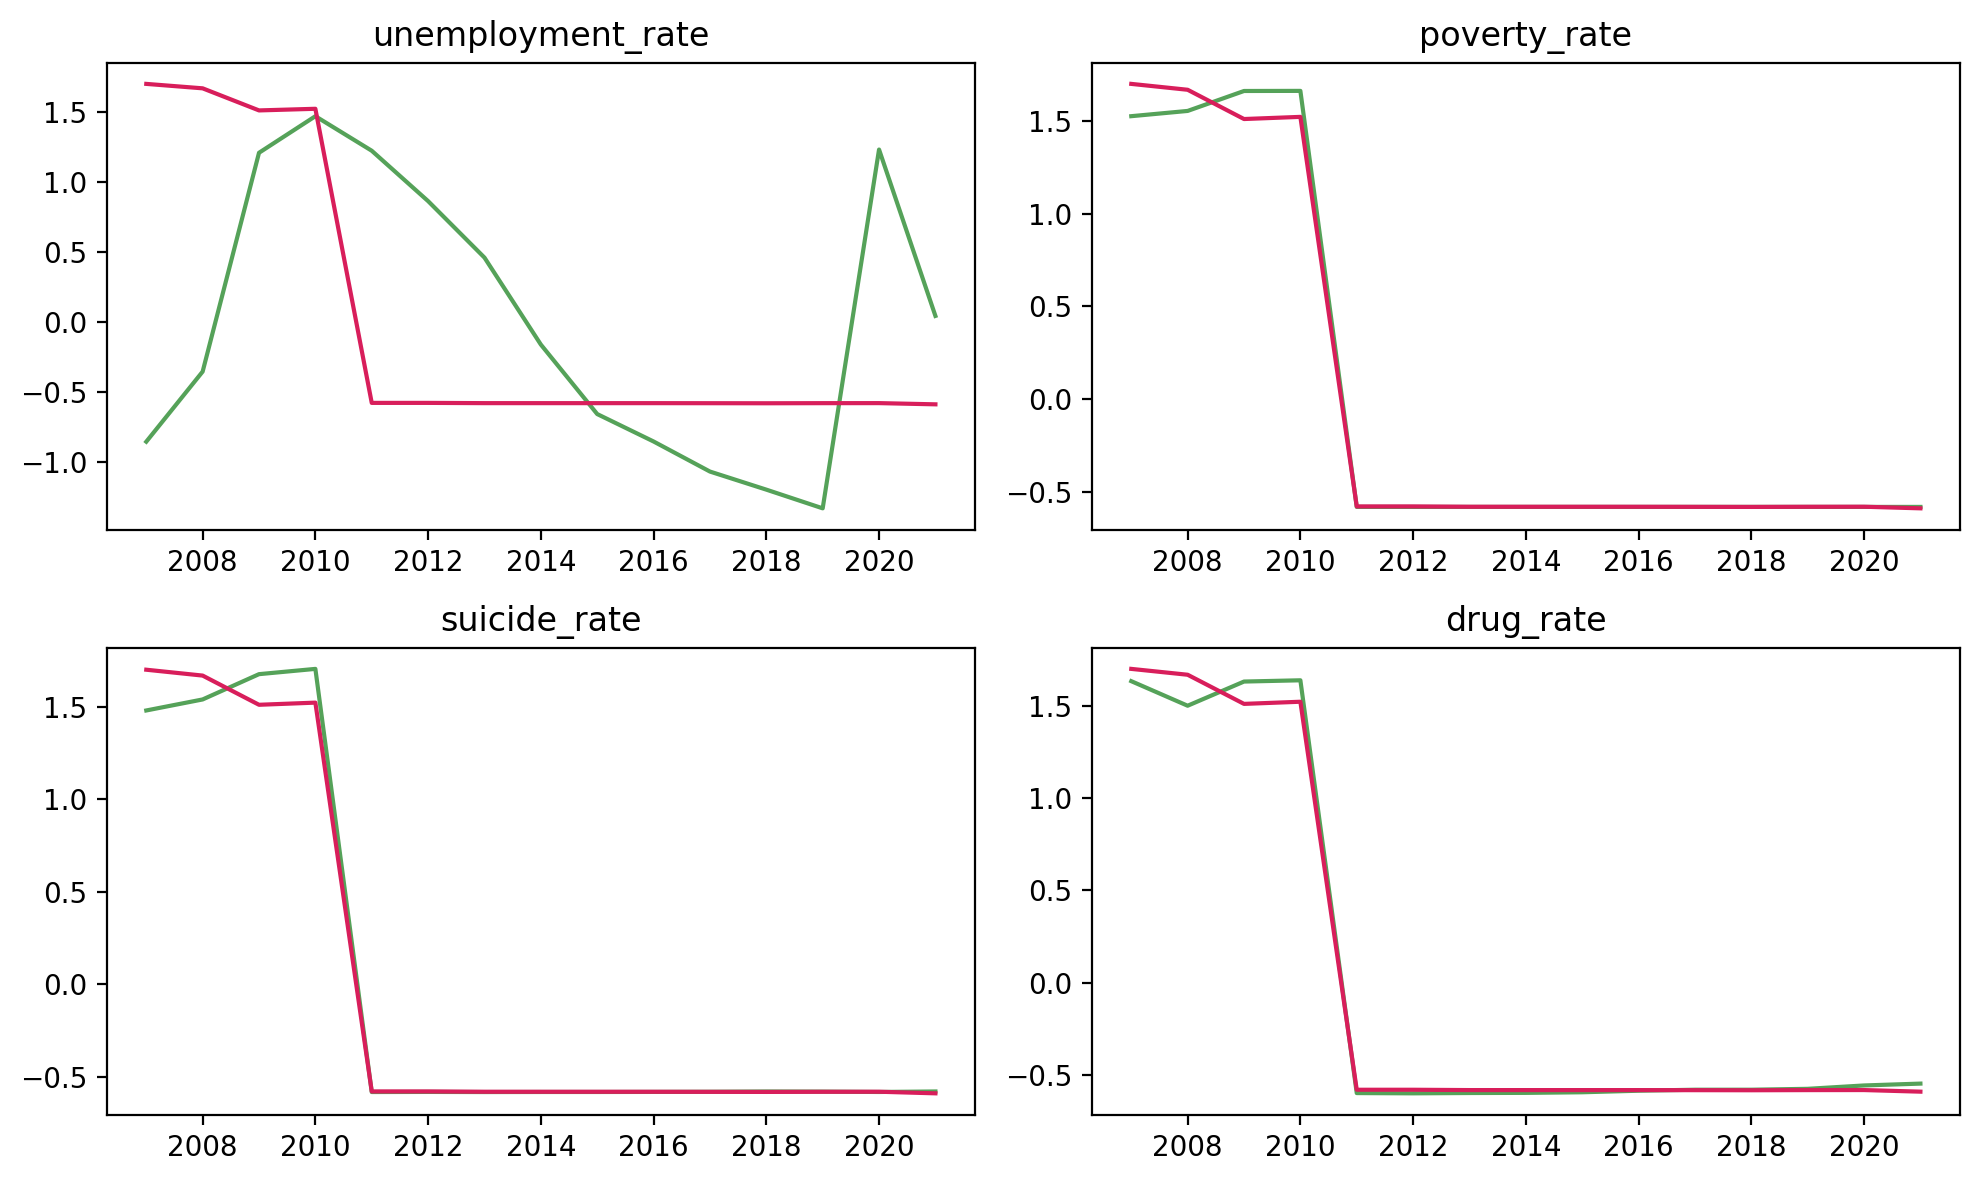

In [ ]:
homeless_grp_by = data.groupby(["Year"])["homeless_rate"].mean().reset_index()
homeless_grp_by["scaled_homelessness"] = (
    homeless_grp_by["homeless_rate"] - homeless_grp_by["homeless_rate"].mean()
) / homeless_grp_by["homeless_rate"].std()
homeless_data_year = homeless_grp_by["scaled_homelessness"].values.tolist()

years = [i for i in range(2007, 2022)]

factors = ["unemployment_rate", "poverty_rate", "suicide_rate", "drug_rate"]
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# group_by
for i, factor in enumerate(factors):
    tmp_grp_by = data.groupby(["Year"])[factor].mean().reset_index()
    tmp_grp_by["scaled_col"] = (tmp_grp_by[factor] - tmp_grp_by[factor].mean())/tmp_grp_by[factor].std()
    tmp_factor = tmp_grp_by["scaled_col"].values.tolist()
    axs[i // 2, i % 2].plot(years, tmp_factor, color="#55A259")
    axs[i // 2, i % 2].plot(years, homeless_data_year, color="#D81E5B")
    axs[i // 2, i % 2].set_title(factor)

plt.tight_layout()
plt.show()


In [ ]:
#create rate lists
homeless_grp_by = data.groupby(["Year"])["homeless_rate"].mean().reset_index()
unemp_grp_by = data.groupby(["Year"])["unemployment_rate"].mean().reset_index()
suicide_grp_by = data.groupby(["Year"])["suicide_rate"].mean().reset_index()
drug_grp_by = data.groupby(["Year"])["drug_rate"].mean().reset_index()
poverty_grp_by = data.groupby(["Year"])["poverty_rate"].mean().reset_index()

homeless_data_year = homeless_grp_by["homeless_rate"].values.tolist()
suicide_rate = suicide_grp_by["suicide_rate"].values.tolist()
drug_rate = drug_grp_by["drug_rate"].values.tolist()
poverty_rate = poverty_grp_by["poverty_rate"].values.tolist()
unemployment_rate = unemp_grp_by["unemployment_rate"].values.tolist()

col_data = [homeless_data_year, suicide_rate, drug_rate, poverty_rate, unemployment_rate]

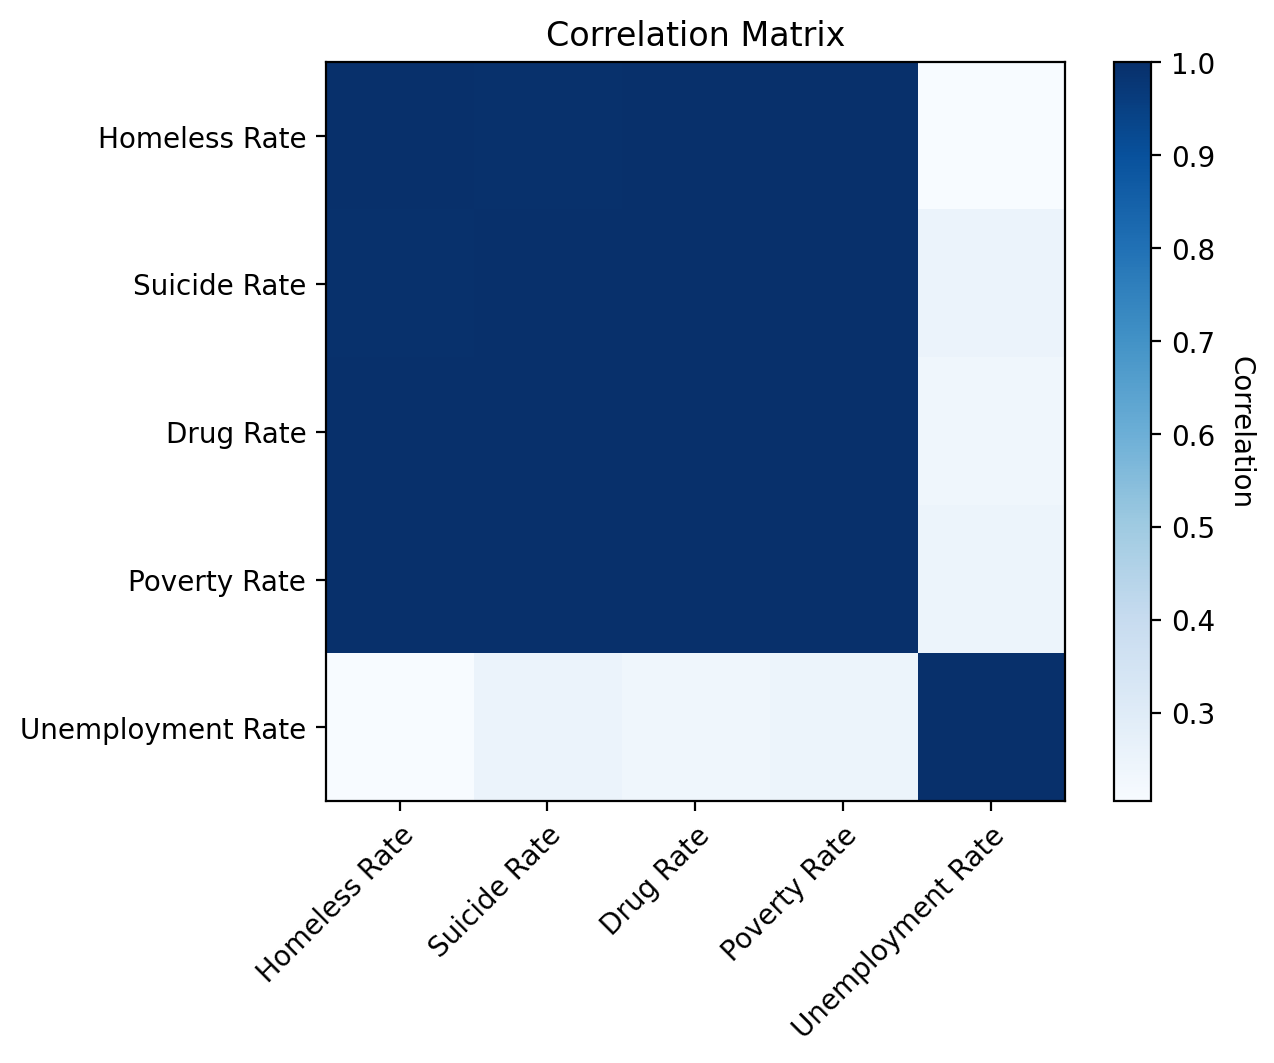

In [ ]:
# create correlation matrix
import numpy as np
corr = np.corrcoef(col_data)

fig, ax = plt.subplots()
im = ax.imshow(corr, cmap="Blues")

ax.set_xticks(np.arange(len(corr)))
ax.set_yticks(np.arange(len(corr)))
ax.set_xticklabels(['Homeless Rate', 'Suicide Rate', 'Drug Rate', 'Poverty Rate', 'Unemployment Rate'])
ax.set_yticklabels(['Homeless Rate', 'Suicide Rate', 'Drug Rate', 'Poverty Rate', 'Unemployment Rate'])

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom")
ax.set_title("Correlation Matrix")

plt.show()

### Q3

### How  do the demographics of the homeless compare with the national average? — for every 5 years

In [ ]:
#2007, 2012, 2017, 2021 ploting hispan, non hispanic, homeless rate

years_to_consider = [2007,2012,2017,2021]

homeless_year = []
hispan_year = []
non_hispan_year = []

for i, year in enumerate(years_to_consider):
    subset = data[data["Year"]== year]
    tmp_homeless = data["homeless_rate"].mean()
    tmp_hisp = data["Hispanic"].mean()
    tmp_non_hisp = data["Non Hispanic"].mean()

    homeless_year.append(tmp_homeless)
    hispan_year.append(tmp_hisp)
    non_hispan_year.append(tmp_non_hisp)


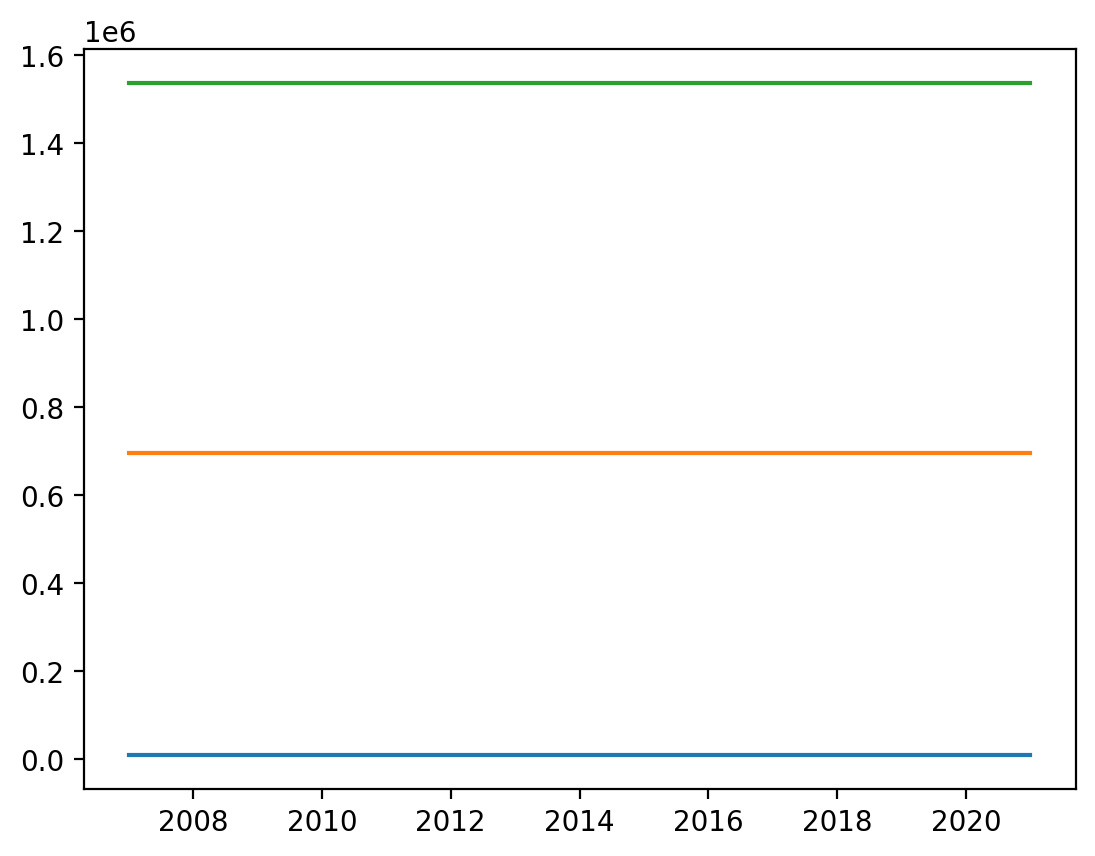

In [195]:
plt.plot(years_to_consider,homeless_year)
plt.plot(years_to_consider, hispan_year)
plt.plot(years_to_consider, non_hispan_year)